In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 157s 1us/step


C:\Users\PRAVEEN ANANTH\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.3938 - loss: 1.6845 - val_accuracy: 0.5312 - val_loss: 1.3322
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5706 - loss: 1.2201 - val_accuracy: 0.5804 - val_loss: 1.1729
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6224 - loss: 1.0782 - val_accuracy: 0.6034 - val_loss: 1.1408
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6615 - loss: 0.9792 - val_accuracy: 0.6282 - val_loss: 1.0724
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.6857 - loss: 0.9036 - val_accuracy: 0.6338 - val_loss: 1.0639
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


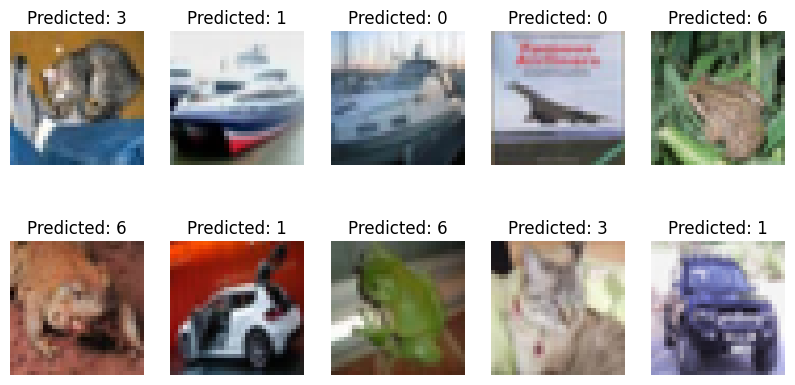

Test Accuracy: 62.38%


In [5]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
plt.show()

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
